# Open files ( scores & lat and lon)

In [1]:
    from osgeo import gdal
    import numpy as np
    from mpl_toolkits.basemap import Basemap
    from scipy.interpolate import griddata
    import matplotlib.pyplot as plt
        
    src_lat='/Users/reem/Documents/DeepLearning/code/showResultOnMap/lat_2.npy'
    lat_arr = np.array(np.load(src_lat))
    lat_arr = np.flipud(lat_arr)
    lat_arr_slice=lat_arr[400:1543 ,0:5313]


    src_lon='/Users/reem/Documents/DeepLearning/code/showResultOnMap/lon_2.npy'
    lon_arr = np.array(np.load(src_lon))
    lon_arr = np.flipud(lon_arr)
    lon_arr_slice=lon_arr[400:1543 ,0:5313]


    

# Deep learning Result

In [9]:
    
    #src_z='/Users/reem/Documents/DeepLearning/code/showResultOnMap/scores.npy'
    src_z='/Users/reem/Documents/DeepLearning/code/final_scores.npy'
    z_score_arr = np.array(np.load(src_z))
    z_score_arr = np.flipud(z_score_arr)

    score_slice=z_score_arr[400:1543 ,:]

# CCD Result 

In [3]:
filepath67 = r"/Users/reem/projAlaith/merged/interferograms/20181108_20181120/filt_fine.cor"
filepath68 = r"/Users/reem/projAlaith/merged/interferograms/20181120_20181202/filt_fine.cor"

ds67 = np.array(gdal.Open(filepath67).ReadAsArray())
ds68 = np.array(gdal.Open(filepath68).ReadAsArray())

CCD=np.subtract(ds67,ds68)
#np.save('subtract_coh1108-1120-1202.npy', coh1)
CCD = np.flipud(CCD)

CCD_slice=CCD[400:1543 ,0:5313]

# Show In Figure

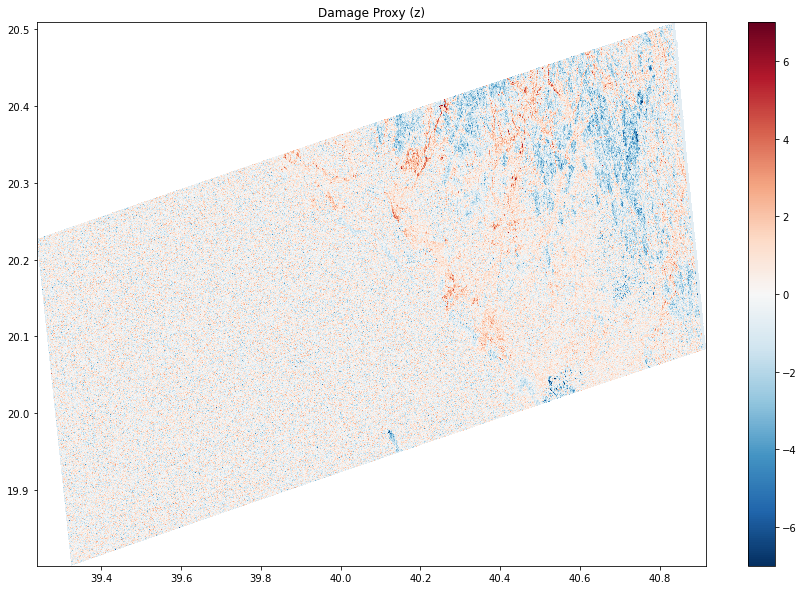

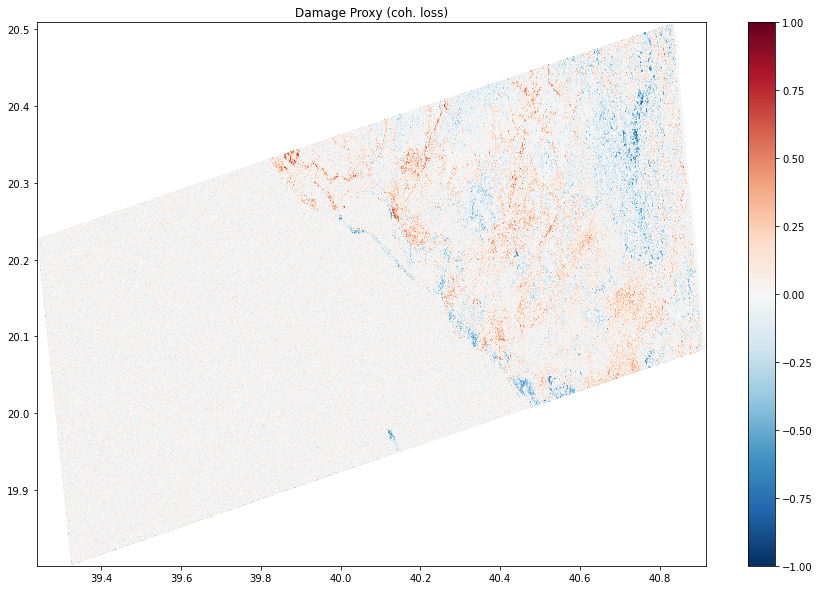

In [4]:
  
    
    plt.figure(figsize=(15,10)) 

    #score_slice = np.ma.masked_array(score_slice, score_slice > -1)
   # cmap = plt.cm.Reds
   # plt.pcolormesh(z, vmin=-5, vmax=5, cmap="RdYlBu")
    
    plt.pcolormesh(lon_arr_slice,lat_arr_slice,score_slice[:-1, :-1],vmin=-7, vmax=7,cmap="RdBu_r") #vmin=-5, vmax=1
    plt.colorbar()  
    plt.title("Damage Proxy (z)") 

    plt.savefig('RNN_pcolormesh.tif')
    plt.show()
    
    plt.figure(figsize=(15,10)) 
    
    plt.pcolormesh(lon_arr_slice,lat_arr_slice,CCD_slice[:-1, :-1],vmin=-1, vmax=1, cmap="RdBu_r") #vmin=-5, vmax=1
    plt.colorbar()  
    plt.title("Damage Proxy (coh. loss)") 

    plt.savefig('CCD_pcolormesh.tif')
    plt.show()

# Threshold

/var/folders/_8/q64r1wlx3ys7b7xtkqqf2h940000gn/T/ipykernel_12780/180820075.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon_arr_slice,lat_arr_slice,score_slice2,vmin=4.93, vmax=6, cmap="RdBu_r") #vmin=-5, vmax=1


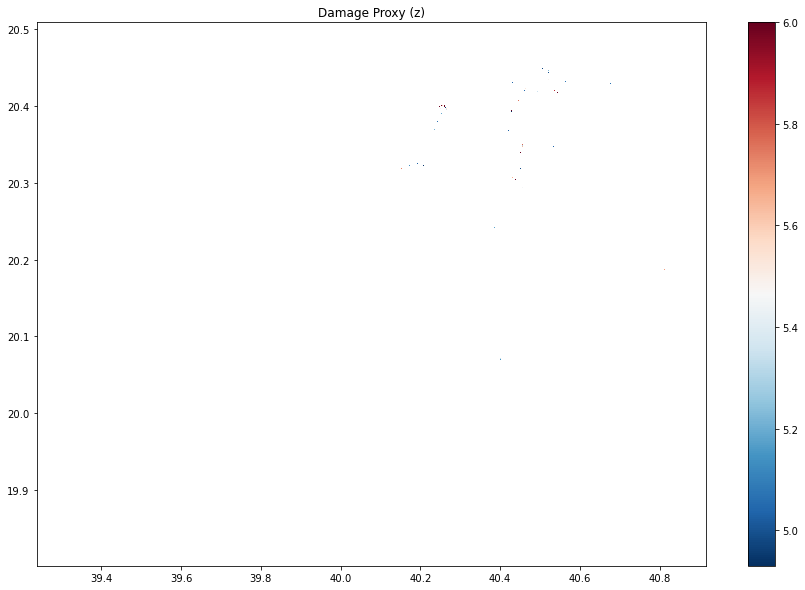

In [13]:
  
    
    plt.figure(figsize=(15,10)) 

    score_slice2 = np.ma.masked_array(score_slice, score_slice<4.93)
    cmap = plt.cm.Reds
   # plt.pcolormesh(z, vmin=-5, vmax=5, cmap="RdYlBu")
    cmap = plt.cm.Reds 
    plt.pcolormesh(lon_arr_slice,lat_arr_slice,score_slice2,vmin=4.93, vmax=6, cmap="RdBu_r") #vmin=-5, vmax=1
    
    #plt.pcolormesh(lon_arr_slice,lat_arr_slice,score_slice2[:-1, :-1],cmap="RdBu_r") #vmin=-5, vmax=1
    plt.colorbar()  
    plt.title("Damage Proxy (z)") 

    #plt.savefig('RNN_pcolormesh.tif')
    plt.show()
    

In [ ]:
# Implementation of matplotlib function
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
      
dx, dy = 0.015, 0.05
x = np.arange(-4.0, 4.0, dx)
y = np.arange(-4.0, 4.0, dy)
X, Y = np.meshgrid(x, y)
   
extent = np.min(x), np.max(x), np.min(y), np.max(y)
   
Z1 = np.add.outer(range(8), range(8)) % 2
plt.imshow(Z1, cmap ="binary_r", interpolation ='nearest',
                               extent = extent, alpha = 1)
   
def geeks(x, y):
    return (1 - x / 2 + x**5 + y**6) * np.exp(-(x**2 + y**2))
   
Z2 = geeks(X, Y)
   
plt.imshow(Z2, cmap ="Greens", alpha = 0.7, 
           interpolation ='bilinear', extent = extent)
  
plt.title('matplotlib.pyplot.imshow() function Example', 
                                     fontweight ="bold")
plt.show()